In [73]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf 

In [74]:
train_data = pd.read_csv('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [75]:
#preprocess
train_data = train_data.replace(["female","male"],[0,1])
train_data = train_data.replace(["S","C","Q"],[0,1,2])
train_data = train_data.fillna(0)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0.0


In [76]:
Y_train = train_data[["Survived"]]
X_train = train_data[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]


Y_train = np.array(Y_train)
X_train = np.array(X_train)

X_train.shape

(891, 7)

In [77]:
model = tf.keras.models.Sequential([
     tf.keras.layers.Dense(7,activation="relu"),
     tf.keras.layers.Dense(128,activation="relu"),
     tf.keras.layers.Dense(67,activation="relu"),
     tf.keras.layers.Dense(32,activation="relu"),
     tf.keras.layers.Dense(2,activation="softmax"),
])

In [78]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, decay=0.01),
               loss=tf.keras.losses.sparse_categorical_crossentropy,
               metrics=['accuracy'])


In [79]:
output = model.fit(X_train,Y_train ,epochs=200)

Epoch 1/200
28/28 [==============================] - 0s 739us/step - loss: 0.6938 - accuracy: 0.6128
Epoch 2/200
28/28 [==============================] - 0s 702us/step - loss: 0.6440 - accuracy: 0.6195
Epoch 3/200
28/28 [==============================] - 0s 776us/step - loss: 0.6326 - accuracy: 0.6240
Epoch 4/200
28/28 [==============================] - 0s 739us/step - loss: 0.6274 - accuracy: 0.6195
Epoch 5/200
28/28 [==============================] - 0s 739us/step - loss: 0.6238 - accuracy: 0.6251
Epoch 6/200
28/28 [==============================] - 0s 739us/step - loss: 0.6223 - accuracy: 0.6296
Epoch 7/200
28/28 [==============================] - 0s 665us/step - loss: 0.6205 - accuracy: 0.6251
Epoch 8/200
28/28 [==============================] - 0s 702us/step - loss: 0.6189 - accuracy: 0.6330
Epoch 9/200
28/28 [==============================] - 0s 702us/step - loss: 0.6194 - accuracy: 0.6229
Epoch 10/200
28/28 [==============================] - 0s 702us/step - loss: 0.6168 - accura

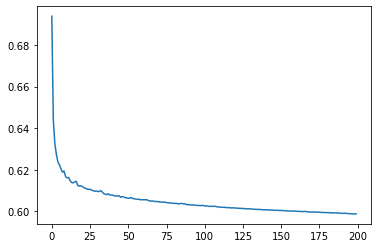

In [80]:
plt.plot(output.history['loss'])

In [81]:
test_data = pd.read_csv('test.csv')
test_data_target = pd.read_csv('gender_submission.csv')

test_data = test_data.replace(["female","male"],[0,1])
test_data = test_data.replace(["S","C","Q"],[0,1,2])
test_data = test_data.fillna(0)

Y_test = test_data_target[["Survived"]]
X_test = test_data[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]


Y_test = np.array(Y_test)
X_test = np.array(X_test)


In [82]:
model.evaluate(X_test,Y_test)

14/14 [==============================] - 0s 614us/step - loss: 0.6229 - accuracy: 0.6483


[0.6228935122489929, 0.6483253836631775]

In [83]:
class KNearestNeighbors:
    def __init__(self, k):
        self.k = k
        
    def fit(self, X_train, Y_train):
        self.X_train = X_train
        self.Y_train = Y_train
        self.number_class = len(np.unique(Y_train))
        
    def nearestNeighbors(self, X_test):
        distance = np.sqrt(np.sum((X_test - self.X_train)**2, axis = 1))
        near_neighbor = np.argsort(distance)[0:self.k]
        return near_neighbor
    
    def predict(self, X_test):
        self.X_test = X_test
        y_predict=[]
        for i, test in enumerate(self.X_test):
            near_neighbor = self.nearestNeighbors(test)
            y_predict.append([np.argmax(np.bincount(self.Y_train[near_neighbor]))])
        return y_predict
    
    def evaluate(self, X_test, Y_test):
        self.X_test = X_test
        self.Y_test = Y_test
        y_predict=self.predict(self.X_test)
        evaluatation = (y_predict == self.Y_test).sum()/len(self.Y_test)
        return evaluatation, y_predict

In [84]:
Y_train = Y_train.reshape(-1,)
knn = KNearestNeighbors(k=5)
knn.fit(X_train,Y_train)
knn_prediction = knn.predict(X_test)
evaluatation,prediction = knn.evaluate(X_test,Y_test)
print('The Accuracy of KNearestNeighbors classifier is',evaluatation)

The Accuracy of KNearestNeighbors classifier is 0.6555023923444976


In [85]:
class AdalineClassifier:
    def __init__(self):
        pass
    
    def fit(self, X_train, Y_train):
        self.w = np.matmul(inv(np.matmul(X_train.T, X_train)), np.matmul(X_train.T, Y_train))
        
    def predict(self, X_test):
        Y_predic = np.matmul(X_test, self.w)
        return Y_predic
    
    def evaluate(self, X_test, Y_test):
        self.X_test = X_test
        self.Y_test = Y_test
        Y_predic = np.matmul(self.X_test, self.w)
        predic = []
        for i, pred in enumerate(Y_predic):
            if pred > 0.5:
                predic.append([1])
            elif pred < 0.5:
                predic.append([0])
        evaluatation = ((predic == self.Y_test).sum())/len(self.Y_test)
        return evaluatation, predic

In [86]:
from numpy.linalg import inv
model = AdalineClassifier()
model.fit(X_train, Y_train)
y_predic = model.predict(X_test)
evaluatation, prediction = model.evaluate(X_test, Y_test)
print('The Accuracy of AdalineClassifier is', evaluatation)

The Accuracy of AdalineClassifier is 0.8971291866028708


In [87]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


class Percepton:
    def __init__(self):
        pass

    def fit(self, X_train, Y_train):
        self.X_train = X_train
        self.Y_train = Y_train
        self.number_class = len(np.unique(Y_train))
        x_range = np.arange(self.X_train[:, 0].min(), self.X_train[:, 0].max(), 0.01)
        y_range = np.arange(self.X_train[:, 1].min(), self.X_train[:, 1].max(), 0.01)
        x, y = np.meshgrid(x_range, y_range)

        lr = 0.001
        self.w = np.random.rand(7, 1)
        self.b = np.random.rand(1, 1)
        self.Error = []
        for i in range(self.X_train.shape[0]):
            y_pred = np.matmul(self.X_train[i], self.w) + self.b
            e = self.Y_train[i] - y_pred
            a = lr * self.X_train[i, :].T * e
            
            self.w += a.T
            self.b += lr * e

            Y_pred = np.matmul(self.X_train, self.w) + self.b
            error = np.mean(np.abs(self.Y_train - Y_pred))
            self.Error.append(error)

        return self.Error, self.w, self.b

    def predict(self, X_test):
        Y_pred = np.matmul(X_test, self.w) + self.b
        predic = []
        for i, pred in enumerate(Y_pred):
            if pred > 0.5:
                predic.append([1])
            elif pred < 0.5:
                predic.append([0])
        return predic

    def evaluate(self, X_test, Y_test):
        Y_pred = np.matmul(X_test, self.w) + self.b
        predic = []
        for i, pred in enumerate(Y_pred):
            if pred > 0.5:
                predic.append([1])
            elif pred < 0.5:
                predic.append([0])
        accuracy = (predic == Y_test).sum() / len(Y_test)
        error = np.mean(np.abs(Y_test - predic))
        return error, accuracy

    def pltlost(self):
        x = np.arange(0, self.X_train.shape[0])
        plt.plot(x, self.Error, marker='o')
        plt.show()

In [88]:
Y_train = np.array(Y_train)
Y_train = Y_train.reshape(-1,1)
p = Percepton()
Error, w, b = p.fit(X_train, Y_train)
EvalTest, Accuracy = p.evaluate(X_train, Y_train)
print('Test Data Evaluation: ', EvalTest, 'Test Data Accuracy: ', Accuracy)
EvalTest, Accuracy = p.evaluate(X_test, Y_test)
print('Test Data Evaluation: ', EvalTest, 'Test Data Accuracy: ', Accuracy)

Test Data Evaluation:  0.4276094276094276 Test Data Accuracy:  0.5723905723905723
Test Data Evaluation:  0.3803827751196172 Test Data Accuracy:  0.6196172248803827


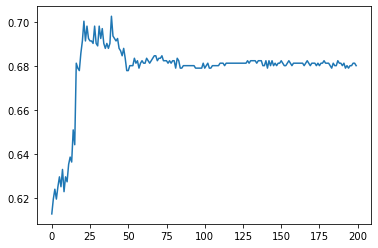

In [89]:
plt.plot(output.history['accuracy'])


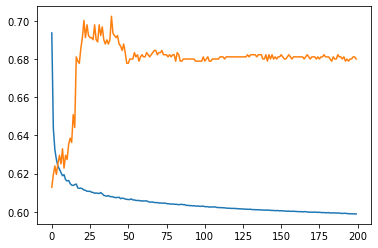

In [90]:
plt.plot(output.history['loss'])
plt.plot(output.history['accuracy'])